In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [24]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
results = pd.read_csv('results.csv', index_col=0)
results['RMSE'] = np.sqrt(results.MSE)
results.head(10)
Bee = results[results.Dataset=='Bee']
Bee.loc[Bee.Function=='F1',['algorithm','MAE','Terms']].Terms.values

array([100,   1,   4,   3,   3,   4])

In [25]:
def genTable(name, metric='MAE'):
    Bee = results[results.Dataset==name]
    f = open('table{}.tex'.format(name), 'w')
    f.write(Bee
     .pivot('Function', 'algorithm', metric)[['LR','PF','GB','EFS', 'RSR']]
     .round(2)
     .to_latex(float_format='%.2f', column_format='ccccc', bold_rows=True)
    )
    f.close()

for dataset in results.Dataset.unique():
    if dataset == 'Neat':
        genTable(dataset,'RMSE')
    else:
        genTable(dataset)

In [4]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn']


['GB' 'LR' 'PF' 'RSR' 'OPT' 'EFS']
['GB' 'LR' 'PF' 'RSR' 'OPT' 'EFS']
['GB' 'LR' 'PF' 'RSR' 'OPT' 'EFS']
['GB' 'LR' 'PF' 'RSR' 'OPT' 'EFS']
['GB' 'LR' 'PF' 'RSR' 'OPT' 'EFS']
['GB' 'LR' 'PF' 'RSR' 'OPT' 'EFS']
['GB' 'LR' 'PF' 'RSR' 'OPT' 'EFS']


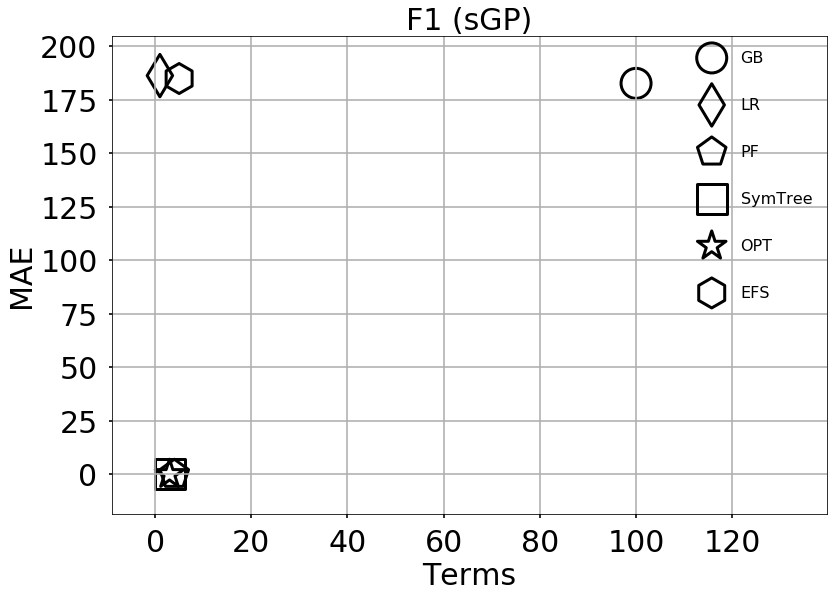

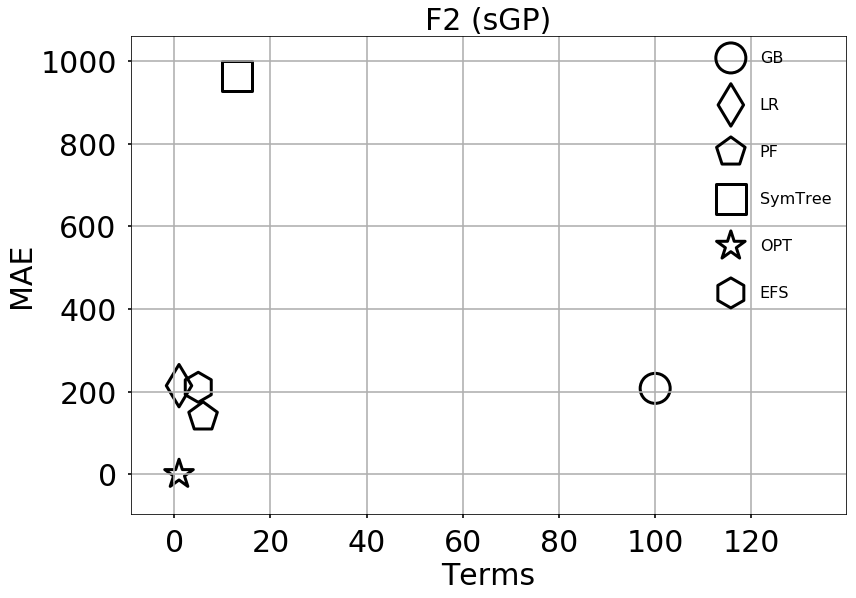

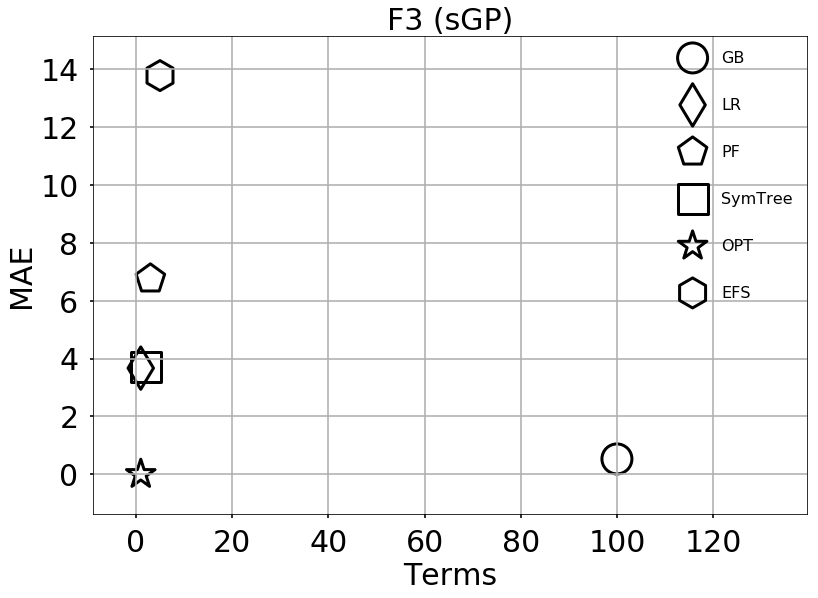

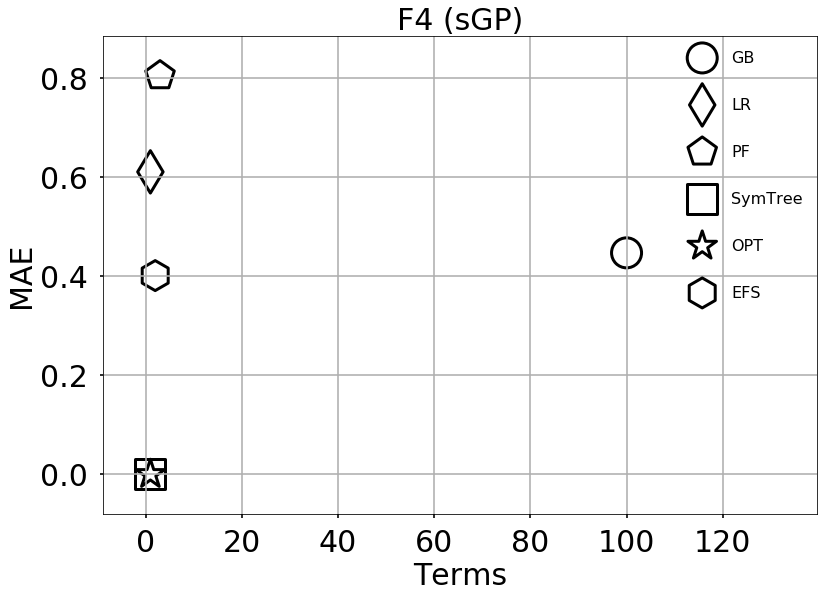

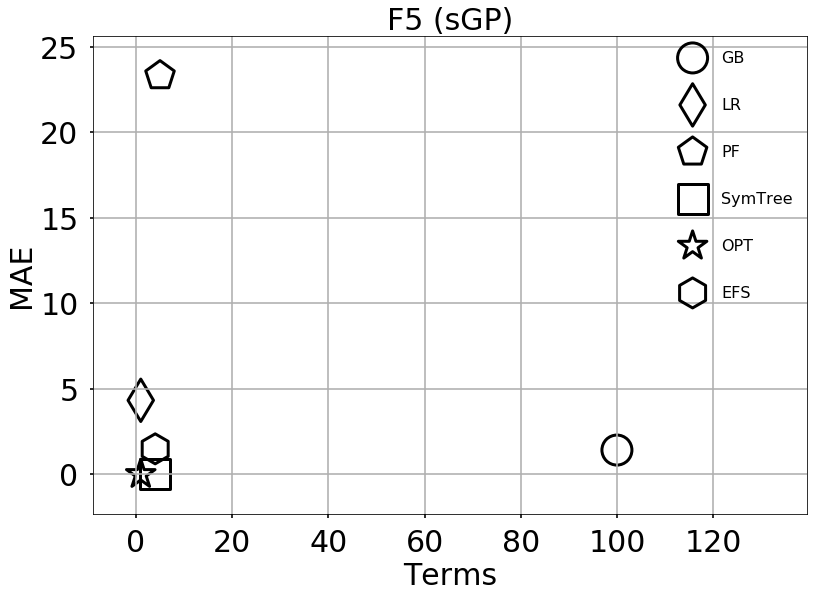

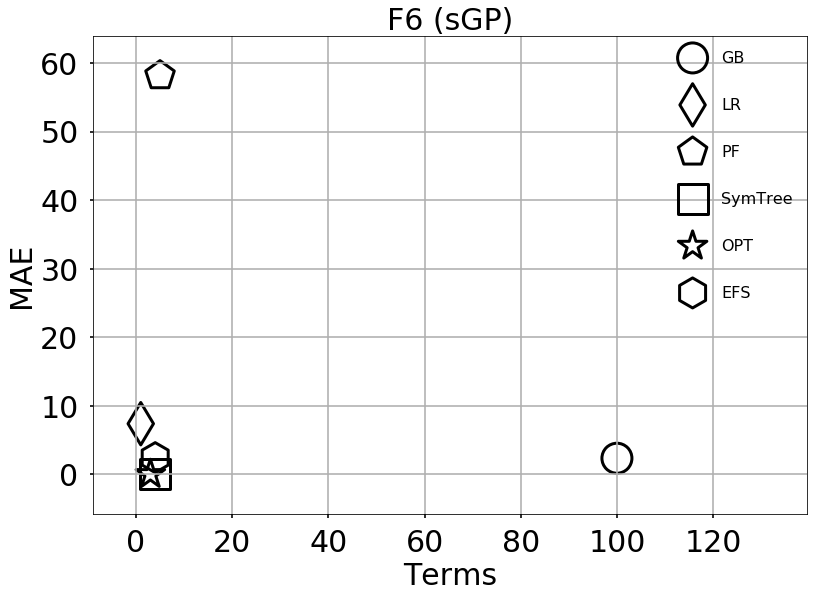

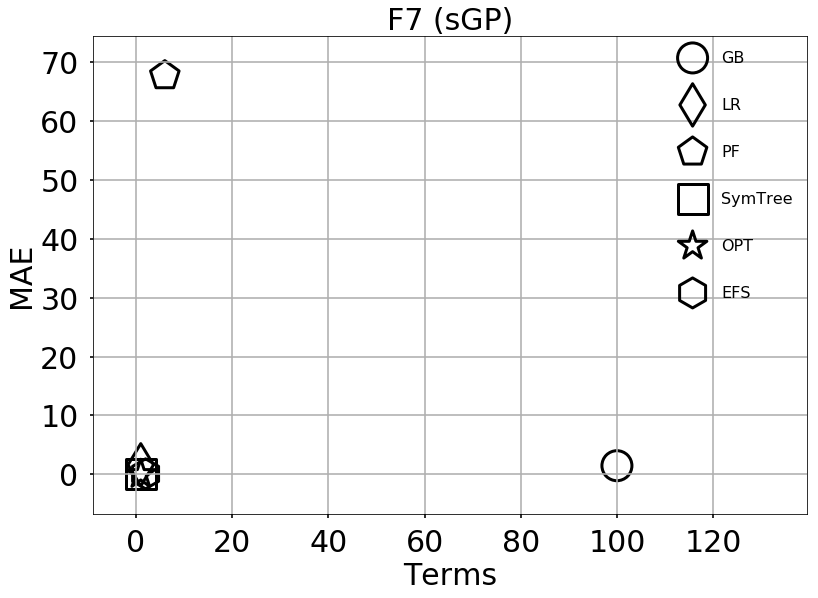

In [27]:
def genPlots(name):
    Bee = results[results.Dataset==name]
    dataname = {'Bee':'ABCP', 'Neat':'neat-GP', 'Surrogate1':'SSGP','Surrogate2':'sGP'}

    for fun in Bee.Function.unique():
        
        plotData = Bee.loc[Bee.Function==fun,['algorithm','MAE','Terms']]
        
        x = plotData.Terms.values
        y = plotData.MAE.values
        labels = Bee.algorithm.unique()
        print(labels)
        markers = {'GB':'o', 'LR':'d', 'PF': 'p', 'SymTree':'s','EFS':'h', 'OPT': '*'}

        plt.style.use('seaborn-poster');
        fig, ax = plt.subplots();  
        plt.grid()
        
        ax.set_xlabel('Terms');
        ax.set_ylabel('MAE');
        ax.set_title('{} ({})'.format(fun,dataname[name]));
        tx = (max(x)-min(x))/10.
        ax.set_xlim([min(x)-tx,max(x)+4*tx])
        tx = (max(y)-min(y))/10.
        ax.set_ylim([min(y)-tx, max(y)+tx])

        for i, txt in enumerate(labels):
            if txt=='RSR':
                txt = 'SymTree'
            ax.scatter(x[i], y[i], marker=markers[txt], s=900, 
                       facecolors='none', edgecolors='black', linewidth=3.0,
                       label=txt) 
        plt.legend(labelspacing=2, scatterpoints=1, frameon=False)


        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(30)

        plt.savefig('InfoScience/Figures/{}{}.eps'.format(name,fun));

#genPlots('Neat')
genPlots('Surrogate2')

In [9]:
polyres = pd.read_csv('result_poly_count.csv')
print(polyres[polyres.dim==3].pivot('order','base','correct').to_latex())

\begin{tabular}{lrrrr}
\toprule
base &     1 &     2 &     3 &     4 \\
order &       &       &       &       \\
\midrule
1     &  30.0 &   NaN &   NaN &   NaN \\
2     &  30.0 &  30.0 &   NaN &   NaN \\
3     &  30.0 &  30.0 &  30.0 &   NaN \\
4     &  30.0 &  30.0 &  28.0 &  30.0 \\
\bottomrule
\end{tabular}



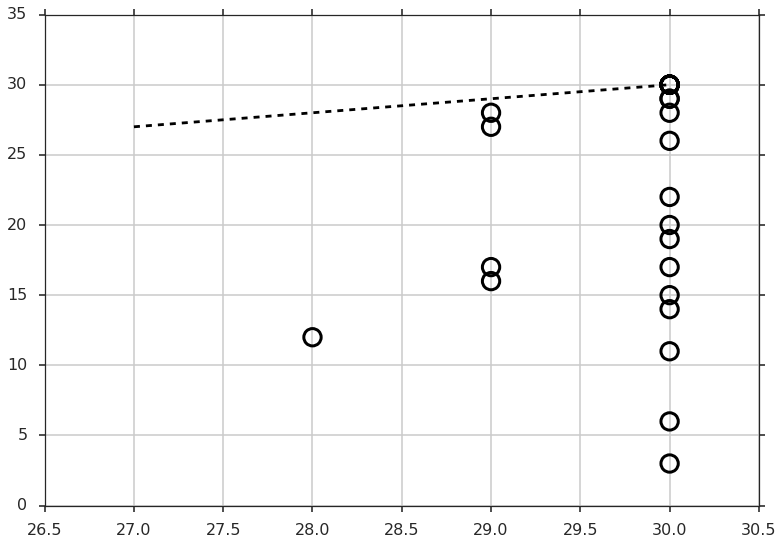

In [32]:
x = np.array([30,30,30,30,30,29,29,30,29,29,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,28,30])
y = np.array([30,30,30,30,29,27,28,19,16,17,30,30,30,30,29,22,20,15,11,3,30,30,30,30,26,28,17,14,12,6])

plt.plot(range(27,31),range(27,31),'--',color='black')
plt.scatter(x,y, marker='o', s=300,facecolors='none', edgecolors='black', linewidth=3.0)
plt.grid()